In [1]:
import pandas as pd

file_path="hr_data.csv"
df=pd.read_csv(file_path)



In [2]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#Checking for missing values
print(df.isnull().any().any())

False


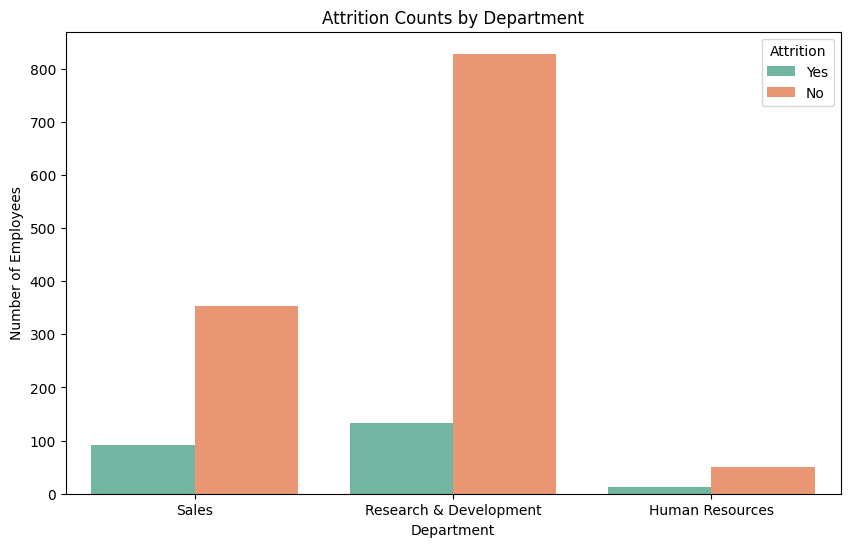

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#Attriction count

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set2')
plt.title("Attrition Counts by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(title='Attrition')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14172\1768923488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary, x='Department', y='MonthlyIncome', palette="Reds")


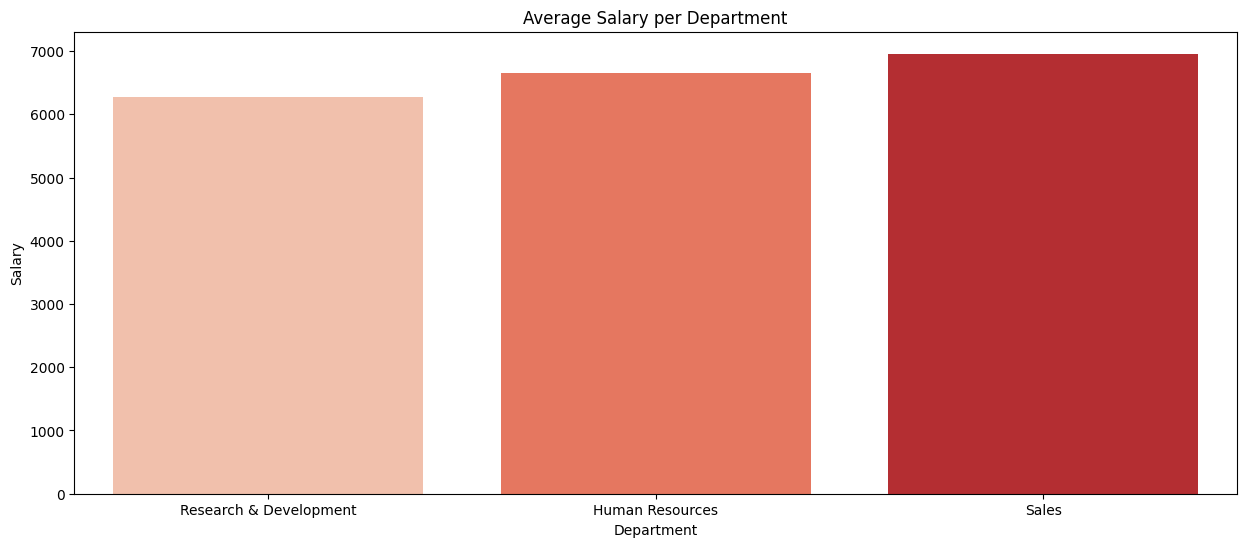

In [6]:
#Avg salary per departmant
avg_salary = df.groupby('Department')['MonthlyIncome'].mean().sort_values(ascending=True).reset_index()

plt.figure(figsize=(15,6))
sns.barplot(data=avg_salary, x='Department', y='MonthlyIncome', palette="Reds")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.title("Average Salary per Department")
plt.show()

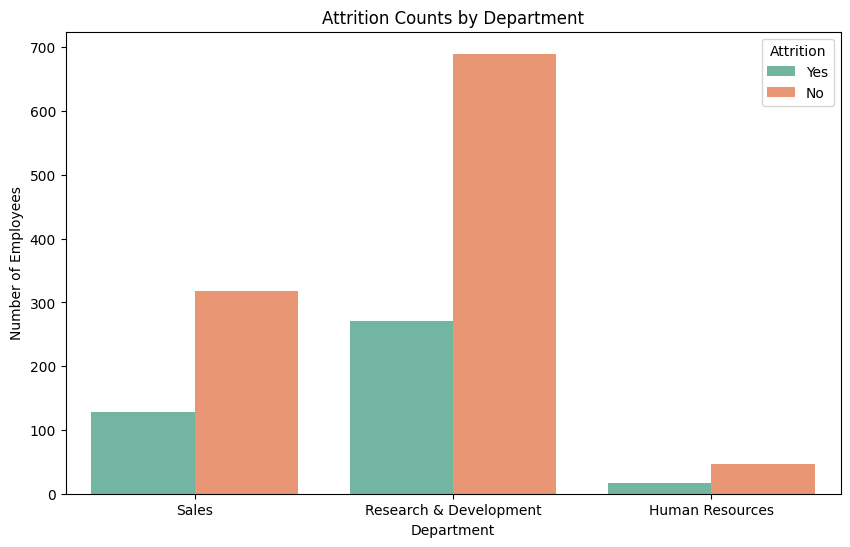

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Department', hue='OverTime', palette='Set2')
plt.title("Attrition Counts by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(title='Attrition')
plt.show()

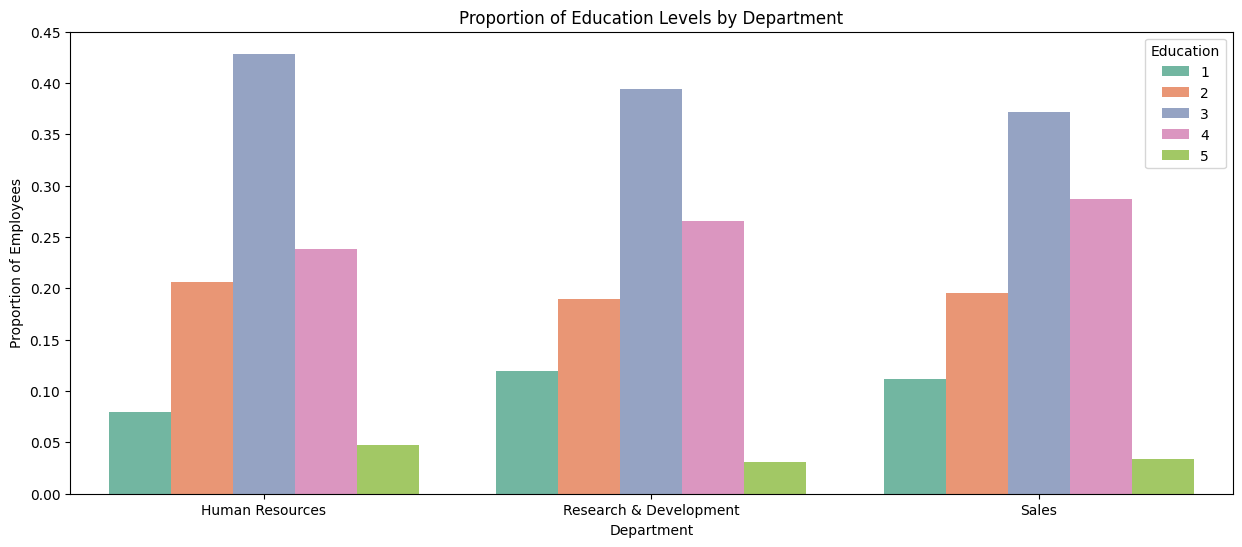

In [8]:


# Compute proportion per department
dept_edu = df.groupby(['Department', 'Education']).size().reset_index(name='count')
dept_totals = df.groupby('Department').size().reset_index(name='total')
dept_edu = dept_edu.merge(dept_totals, on='Department')
dept_edu['proportion'] = dept_edu['count'] / dept_edu['total']

plt.figure(figsize=(15,6))
sns.barplot(data=dept_edu, x='Department', y='proportion', hue='Education', palette='Set2')
plt.title("Proportion of Education Levels by Department")
plt.ylabel("Proportion of Employees")
plt.show()


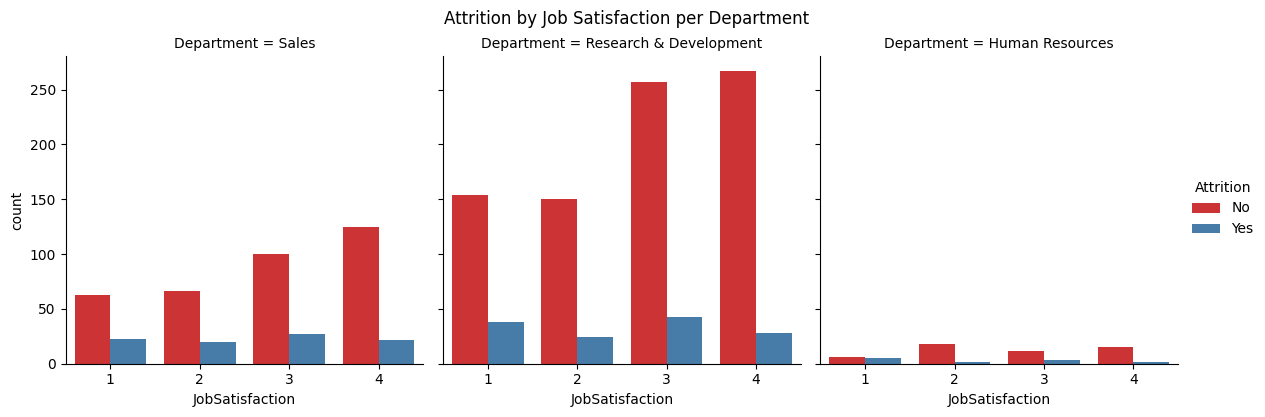

In [9]:
g = sns.catplot(
    data=df, 
    x="JobSatisfaction", 
    hue="Attrition", 
    col="Department",
    kind="count",
    palette="Set1",
    col_wrap=3,
    height=4
)
g.fig.suptitle("Attrition by Job Satisfaction per Department", y=1.03)
plt.show()


In [10]:
df['Attrition_num'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df['CommuteGroup'] = pd.cut(
    df['DistanceFromHome'],
    bins=[0, 5, 20, df['DistanceFromHome'].max()],
    labels=['Nearby (≤5 km)', 'Mid (6–20 km)', 'Far (>20 km)']
)

commute_attrition = df.groupby('CommuteGroup')['Attrition_num'].mean().reset_index()
commute_attrition['AttritionRate(%)'] = commute_attrition['Attrition_num'] * 100
commute_attrition = commute_attrition.drop(columns='Attrition_num')

print(commute_attrition)

     CommuteGroup  AttritionRate(%)
0  Nearby (≤5 km)         13.765823
1   Mid (6–20 km)         16.561514
2    Far (>20 km)         22.058824


C:\Users\User\AppData\Local\Temp\ipykernel_14172\1774472828.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  commute_attrition = df.groupby('CommuteGroup')['Attrition_num'].mean().reset_index()


C:\Users\User\AppData\Local\Temp\ipykernel_14172\4190325985.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=commute_attrition, x='CommuteGroup', y='AttritionRate(%)', palette='coolwarm')


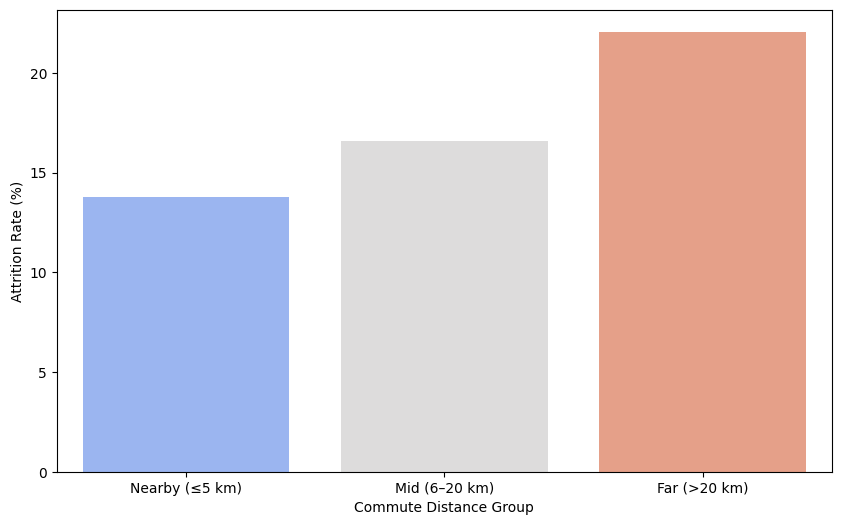

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=commute_attrition, x='CommuteGroup', y='AttritionRate(%)', palette='coolwarm')

plt.ylabel("Attrition Rate (%)")
plt.xlabel("Commute Distance Group")
plt.show()


In [14]:
# Calculate attrition rate
attrition_rate = (
    df.groupby(['Department', 'IncomeGroup'])['Attrition']
    .value_counts(normalize=True)
    .rename('Percent')
    .mul(100)
    .reset_index()
)

# Plot
sns.catplot(
    data=attrition_rate[attrition_rate['Attrition'] == 'Yes'],
    x='IncomeGroup', y='Percent', col='Department',
    kind='bar', palette='Reds', col_wrap=3, height=4
)
plt.suptitle("Attrition Rate by Income Level per Department", y=1.03)
plt.show()

KeyError: 'IncomeGroup'

In [ ]:
# Convert Attrition to numeric
df['Attrition_num'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Compute attrition rate per satisfaction level
attrition_by_satisfaction = (
    df.groupby('JobSatisfaction')['Attrition_num'].mean().mul(100)
)
attrition_by_satisfaction


JobSatisfaction
1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: Attrition_num, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_14172\3907037285.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('JobSatisfactionCategory')['Attrition_num'].mean().mul(100)
C:\Users\User\AppData\Local\Temp\ipykernel_14172\3907037285.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_by_category.index, y=attrition_by_category.values, palette="Reds")


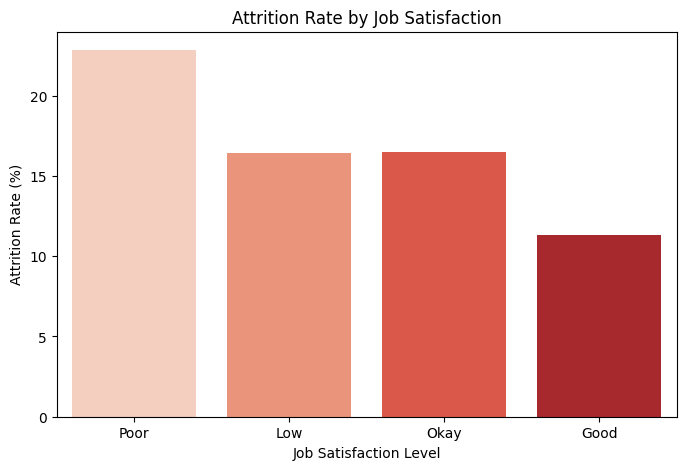

In [ ]:

df['Attrition_num'] = df['Attrition'].map({'Yes': 1, 'No': 0})


bins = [0, 1.5, 2.5, 3.5, 4.5] 
labels = ['Poor', 'Low', 'Okay', 'Good']
df['JobSatisfactionCategory'] = pd.cut(df['JobSatisfaction'], bins=bins, labels=labels)

attrition_by_category = (
    df.groupby('JobSatisfactionCategory')['Attrition_num'].mean().mul(100)
)

# 4️⃣ Plot
plt.figure(figsize=(8,5))
sns.barplot(x=attrition_by_category.index, y=attrition_by_category.values, palette="Reds")
plt.title("Attrition Rate by Job Satisfaction")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Attrition Rate (%)")
plt.show()

